# **Experiment Notebook**



This project involved conducting extensive exploratory data analysis (EDA) to gain valuable insights from the data. Following the EDA, a baseline model was created using a DummyClassifier to establish a performance benchmark. The insights from the EDA and the baseline model serve as foundational steps for further analysis and model improvement.


### 0. Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings('ignore')

### 1.   Load Dataset

In [3]:
# set path to dataset
train_file_url = '../data/raw/train.csv'
test_file_url = '../data/raw/test.csv'

In [4]:
# read the csv file
df = pd.read_csv(train_file_url)
test_df = pd.read_csv(test_file_url)

### 2. Explore Dataset

In [5]:
pd.set_option('display.max_columns', None) # To show all the columns
df.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,b2716b2d-3422-4959-9fe7-fe496414a4e8,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,bb387960-e3a0-4ffd-96ae-184bad07cb8a,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,89bbdf11-eadd-4de4-95e5-03f7e2874aa1,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0c87ada8-8446-4ea2-a05b-bd07aed5f37a,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,84661e00-ad20-4308-817e-efa8da52a86c,0.0


In [6]:
df.shape # shape of the training set

(46618, 64)

In [7]:
df.info() # gives information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46618 entries, 0 to 46617
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 46618 non-null  object 
 1   conf                 46618 non-null  object 
 2   GP                   46618 non-null  int64  
 3   Min_per              46618 non-null  float64
 4   Ortg                 46618 non-null  float64
 5   usg                  46618 non-null  float64
 6   eFG                  46618 non-null  float64
 7   TS_per               46618 non-null  float64
 8   ORB_per              46618 non-null  float64
 9   DRB_per              46618 non-null  float64
 10  AST_per              46618 non-null  float64
 11  TO_per               46618 non-null  float64
 12  FTM                  46618 non-null  int64  
 13  FTA                  46618 non-null  int64  
 14  FT_per               46618 non-null  float64
 15  twoPM                46618 non-null 

In [8]:
df.describe(include='all') # description of all the columns in dataset

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
count,46618,46618,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46326,46554,41939.0,46618.000000,46618.000000,46618.000000,46618.000000,46618,14337.000000,43151.000000,40860.000000,40860.000000,40860.000000,40860.000000,38119.000000,38050.000000,40860.000000,40860.000000,20400.000000,1207.000000,46576.000000,46576.000000,46576.000000,46576.000000,46576.000000,46576.000000,46576.000000,46576.000000,46582.000000,46576.000000,46576.000000,46582.000000,46582.000000,46582.000000,46582.000000,46582.000000,46582.000000,46582.000000,46618,46618.000000
unique,355,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,38,80.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20377,NaN
top,Army,A10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jr,7-Jun,1.0,NaN,NaN,NaN,NaN,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2336a719-c648-440c-821d-32fb0d9760bf,NaN
freq,176,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12401,4615,1743.0,NaN,NaN,NaN,NaN,46618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
mean,NaN,NaN,23.542988,37.339013,91.784360,18.164578,44.424392,47.571397,5.654071,12.575102,10.923008,20.535915,33.357909,47.887597,0.579193,41.521408,85.960444,0.424809,15.379274,44.595264,0.224779,1.877063,1.731048,38.111972,NaN,NaN,NaN,0.779567,89.277666,4.278710,2013.528036,NaN,53.217744,0.922210,27.779809,46.572614,14.853377,41.602619,0.562907,0.322901,3.774498,4.230470,0.866099,33.235294,103.364709,103.513641,1.427313,82.521563,-2.518313,-1.900248,-0.618064,-2.552051,16.949385,-2.088273,-0.463778,0.778630,1.867124,2.645755,1.066943,0.527743,0.283606,5.732429,NaN,0.009524
std,NaN,NaN,10.076829,28.019801,30.235568,6.181982,18.026404,17.217909,9.985025,11.041089,9.430012,12.210669,37.306108,50.190318,0.266445,43.820264,85.556152,0.191180,21.482081,57.557171,0.191479,6.271323,2.148502,36.821462,NaN,NaN,NaN,1.340548,30.669615,4.819912,2.873213,NaN,27.821187,0.691221,29.893780,47.108673,17.834037,45.221695,0.191550,0.170364,7.884873,8.631777,0.229589,16.624054,10.569908,11.405002,1.057080,65.092602,7.701851,5.186198,4.415293,8.305566,10.633054,6.160620,3.303826,0.745045,1.464894,2.096319,1.170469,0.469654,0.422755,4.942544,NaN,0.097127
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,-6.792410,-39.021300,0.000000,2009.000000,NaN,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1330.060000,-1292.020000,-0.857238,0.043033,-88.479400,-92.593500,-57.459400,-242.523000,0.000000,-141.539000,-100.984000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,17.000000,9.600000,83.900000,14.600000,40.000000,43.770000,1.900000,8.400000,4.600000,14.900000,4.000000,7.000000,0.500000,5.000000,13.000000,0.371000,0.000000,1.000000,0.000000,0.000000,0.900000,20.000000,NaN,NaN,NaN,-0.1737

In [9]:
nan_counts = df.isnull().sum() # counting the nan in the dataset
columns_with_nans = nan_counts[nan_counts > 0] # Filter to show only columns with NaN values
print(columns_with_nans)

yr                       292
ht                        64
num                     4679
Rec_Rank               32281
ast_tov                 3467
rimmade                 5758
rimmade_rimmiss         5758
midmade                 5758
midmade_midmiss         5758
rim_ratio               8499
mid_ratio               8568
dunksmade               5758
dunksmiss_dunksmade     5758
dunks_ratio            26218
pick                   45411
drtg                      42
adrtg                     42
dporpag                   42
stops                     42
bpm                       42
obpm                      42
dbpm                      42
gbpm                      42
mp                        36
ogbpm                     42
dgbpm                     42
oreb                      36
dreb                      36
treb                      36
ast                       36
stl                       36
blk                       36
pts                       36
dtype: int64


We can observe that the dataset is messy and needs a lot of cleaning

In [10]:
df.columns # looking at all the columns of dataset

Index(['team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per',
       'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per',
       'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per',
       'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe', 'pfr', 'year',
       'type', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade',
       'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade',
       'dunksmiss_dunksmade', 'dunks_ratio', 'pick', 'drtg', 'adrtg',
       'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm',
       'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts',
       'player_id', 'drafted'],
      dtype='object')

### 3. Explore Target variable

In [11]:
target = 'drafted' # here we are looking at the selection as a draft pick of college students

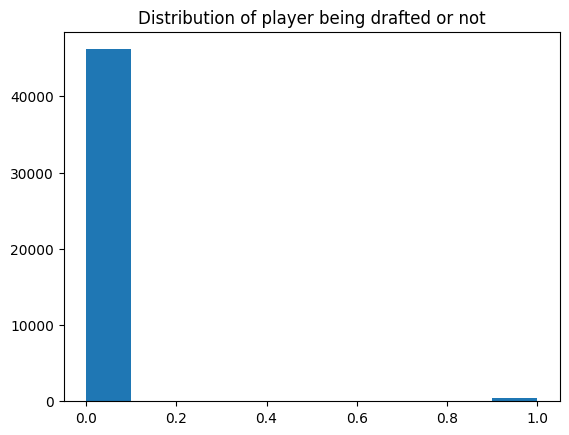

In [12]:
# Histogram plot for the distribution of players who are drafted
plt.hist(df[target])
plt.title('Distribution of player being drafted or not')
plt.show()

The data here is imbalanced showing the majority of the college students not being selected as a NBA player.

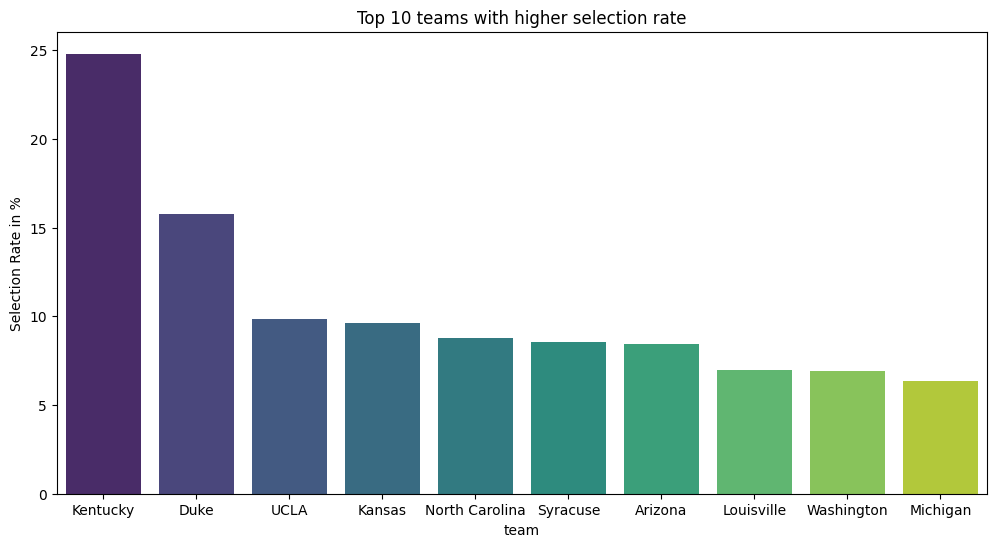

In [13]:
# Observing the top 10 selection rate team
teamSelectionRate = df.groupby('team')['drafted'].mean() * 100 # Caluclating the team selection in each team
selectingTeam = teamSelectionRate.sort_values(ascending=False).reset_index() # arranging it to descending order
selectingTeam.columns = ['team', 'selectionRate'] # Rename the columns
top10SelectingTeam = selectingTeam.head(10) # Looking at top 10 only

# Bar plot to see the top 10 selecting team
plt.figure(figsize=(12,6))
sns.barplot(top10SelectingTeam, x='team', y='selectionRate', palette='viridis', hue='team')
plt.ylabel('Selection Rate in %')
plt.title('Top 10 teams with higher selection rate')
plt.show()

Here, we can observe that the Kentucky team are one of those which have higher selection rate with about 24% into their team followed by Duke, North Carolina, UCLA and Arizona

In [14]:
# Counting the number of teams who didn't select at all
np.sum([teamSelectionRate.values == 0])

np.int64(230)

There are 230 teams which didn't select any college player at all

So, according to this data some of the team doesn't even select the players and has 100% rejection rate

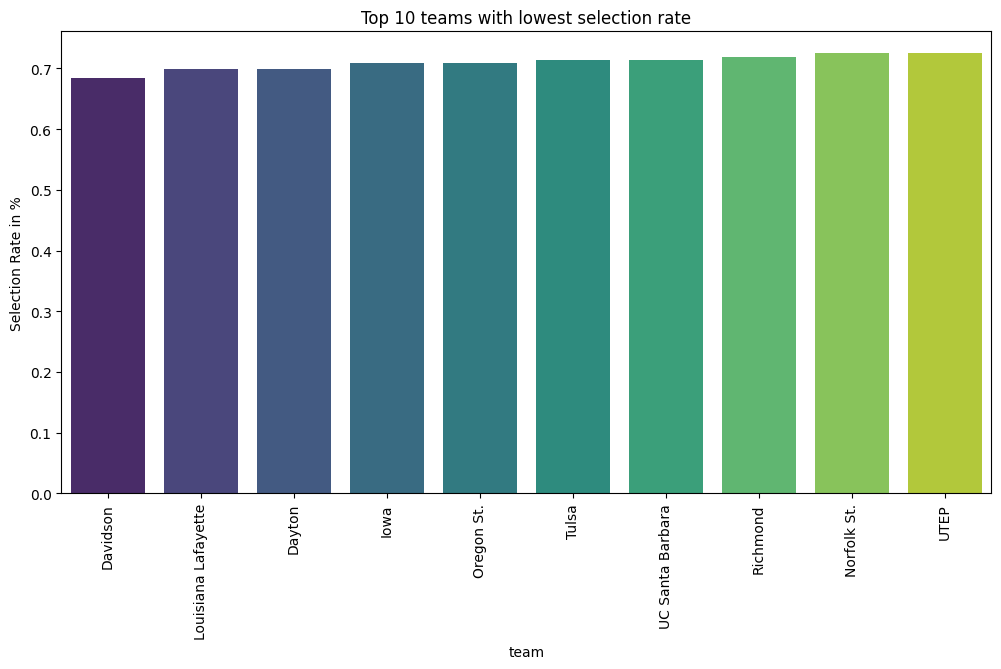

In [15]:
# Looking at the least selecting teams
leastSelectionRateTeam = teamSelectionRate[teamSelectionRate.values > 0] # To avoid teams with no selection
leastSelectingTeam = leastSelectionRateTeam.sort_values(ascending=True).reset_index() # arranging to ascending
leastSelectingTeam.columns = ['team', 'selectionRate'] # rename the columns
least10SelectingTeam = leastSelectingTeam.head(10) # top 10 least selecting team

# Bar plot to show least selecting team
plt.figure(figsize=(12,6))
sns.barplot(least10SelectingTeam, x='team', y='selectionRate', palette='viridis', hue='team')
plt.ylabel('Selection Rate in %')
plt.title('Top 10 teams with lowest selection rate')
plt.xticks(rotation=90)
plt.show()

Some of the team with lowest selection rate rate are shown in the figure above with Yale being least among all the team that drafting players.

### 4. Explore Variables of Interest

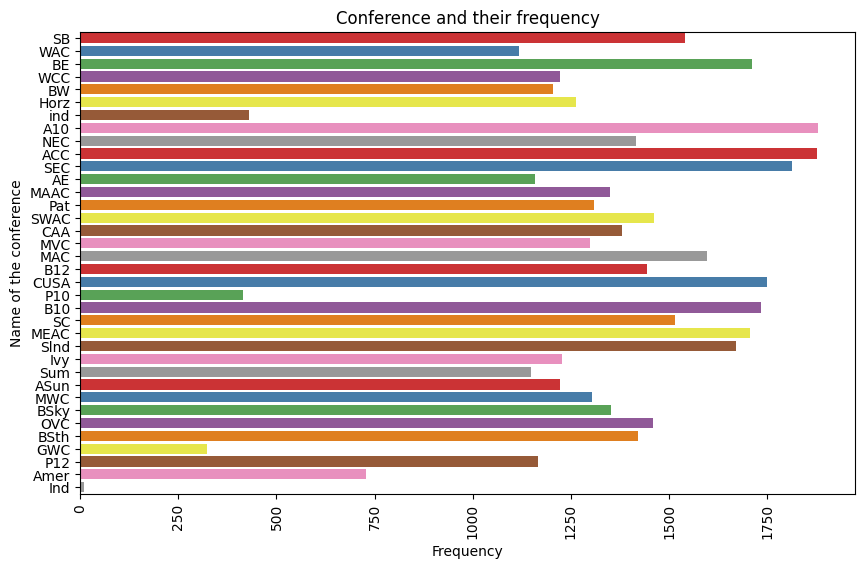

In [16]:
# Countplot of the conference
plt.figure(figsize=(10,6))
sns.countplot(df['conf'],palette = 'Set1')
plt.title('Conference and their frequency')
plt.xlabel('Frequency')
plt.ylabel('Name of the conference')
plt.xticks(rotation = 90)
plt.show()

The A10 and ACC conferences have the highest and ind, P10 and GWC has lowest representation in the dataset, indicating their dominance.

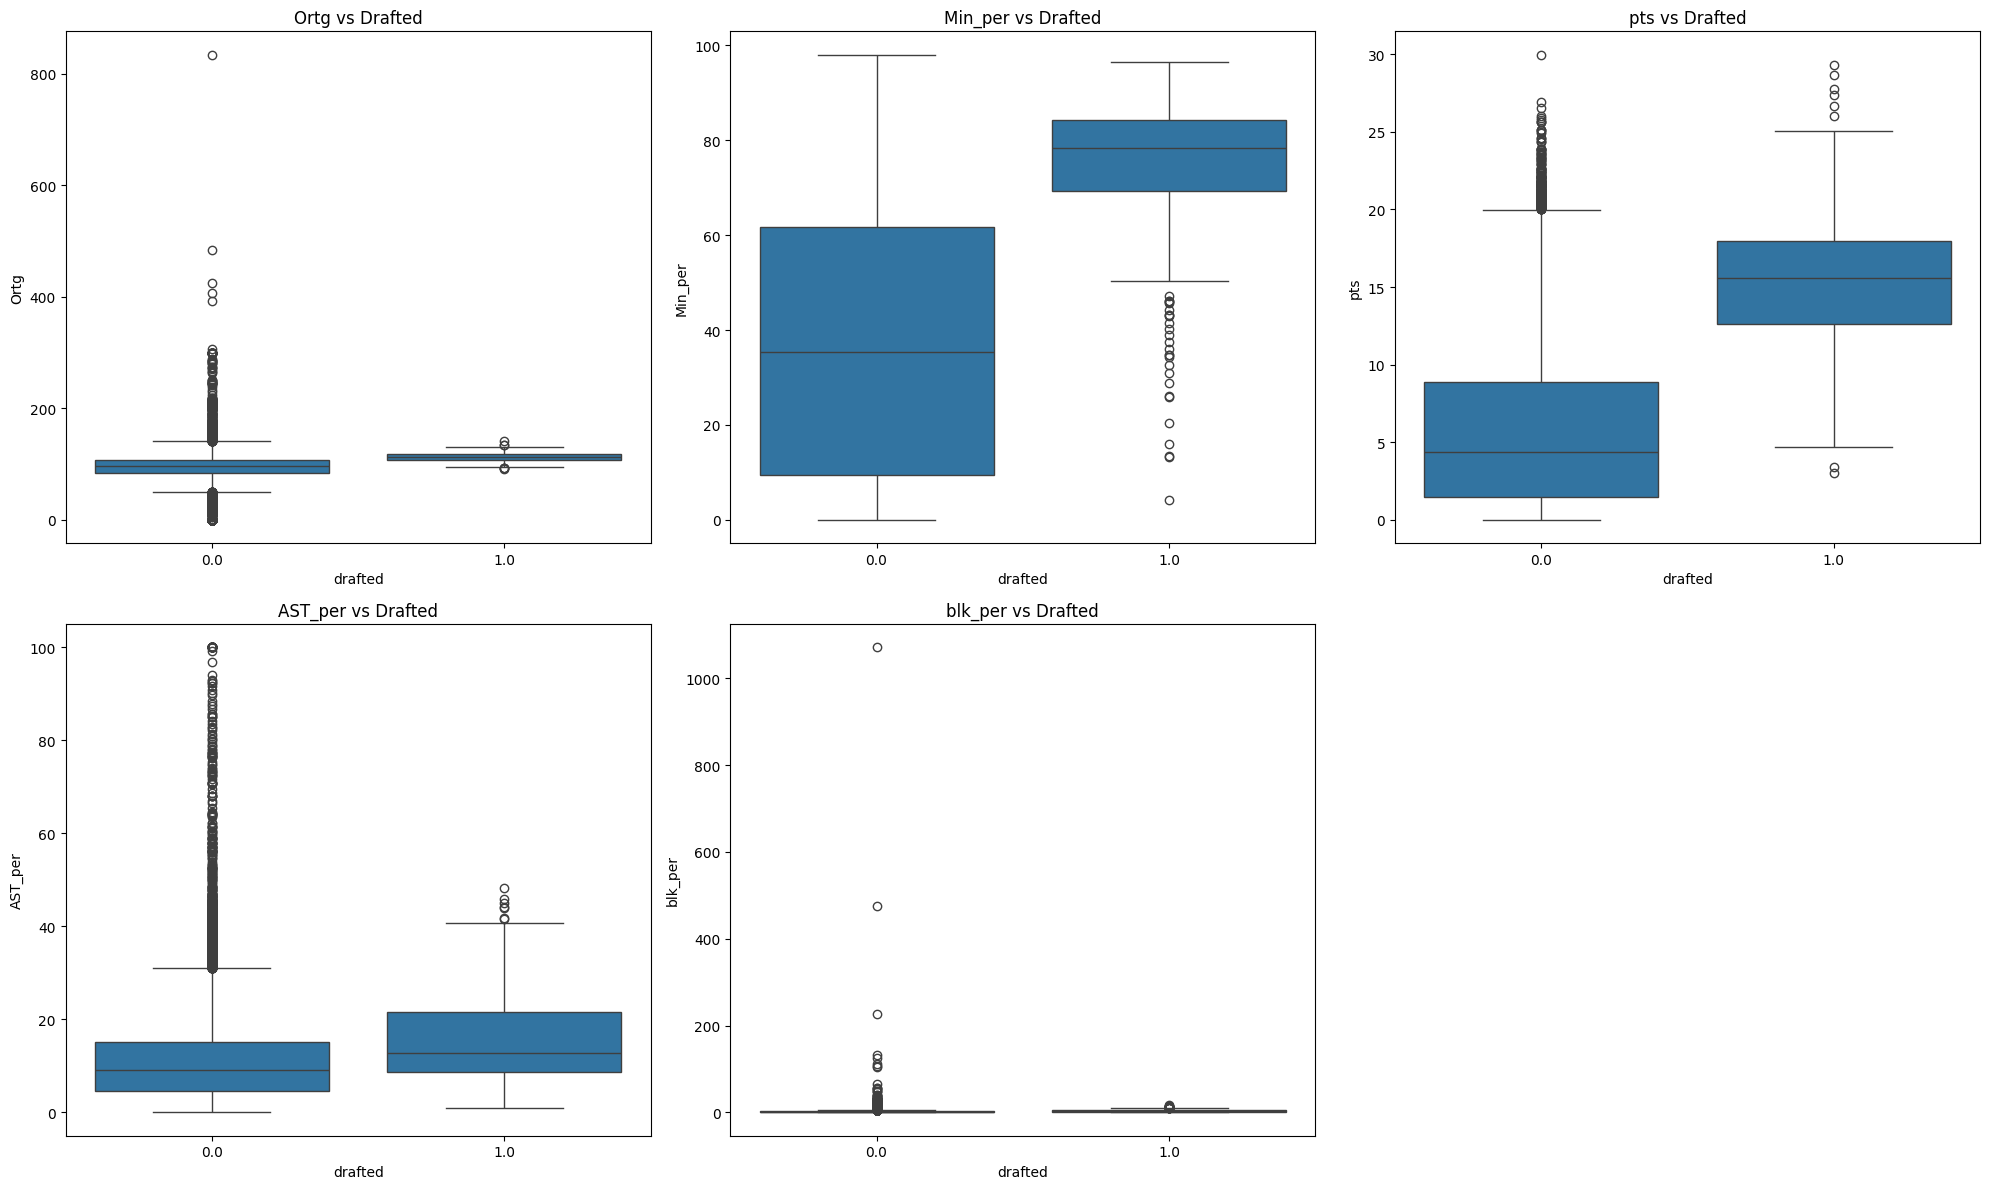

In [17]:
# Relationship Between Features and Target (drafted)
key_features = ['Ortg', 'Min_per', 'pts', 'AST_per', 'blk_per']

plt.figure(figsize=(20, 12))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='drafted', y=feature, data=df)
    plt.title(f'{feature} vs Drafted')
plt.tight_layout()
plt.show()


<li>Minutes per game, points per game, and height appear to be the most significant factors differentiating drafted from undrafted players.</li>
<li>Offensive rating, assists per game, and blocks per game show minimal differences, suggesting they might not be as heavily weighted in draft decisions.</li>
<li>There are outliers in many categories, especially among undrafted players, indicating that some undrafted players perform exceptionally in certain metrics but are still not chosen</li>

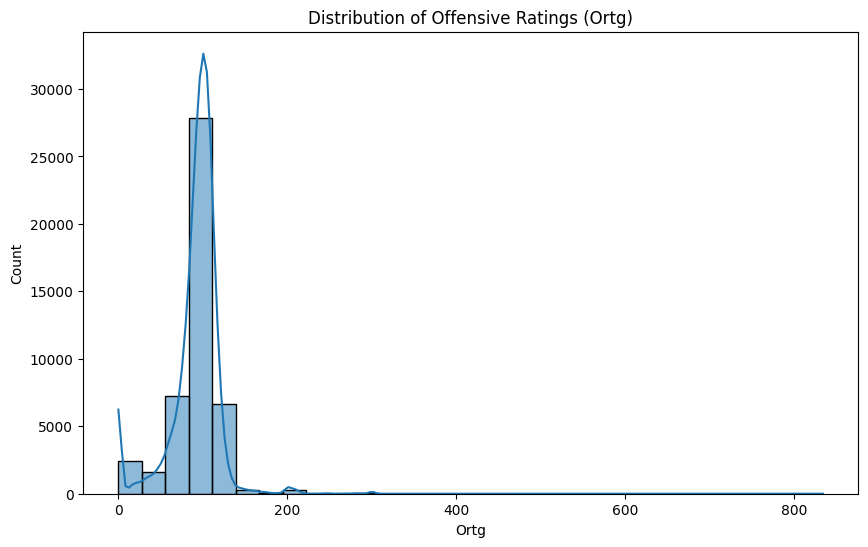

In [18]:
# Hist and kde plot to identify distribution of Offensive Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Ortg'], kde=True, bins=30)
plt.title('Distribution of Offensive Ratings (Ortg)')
plt.show()

The Otrg data is heavily right-skewed, with the majority of players performing within a common range and only a small number standing out with extremely high offensive efficiency

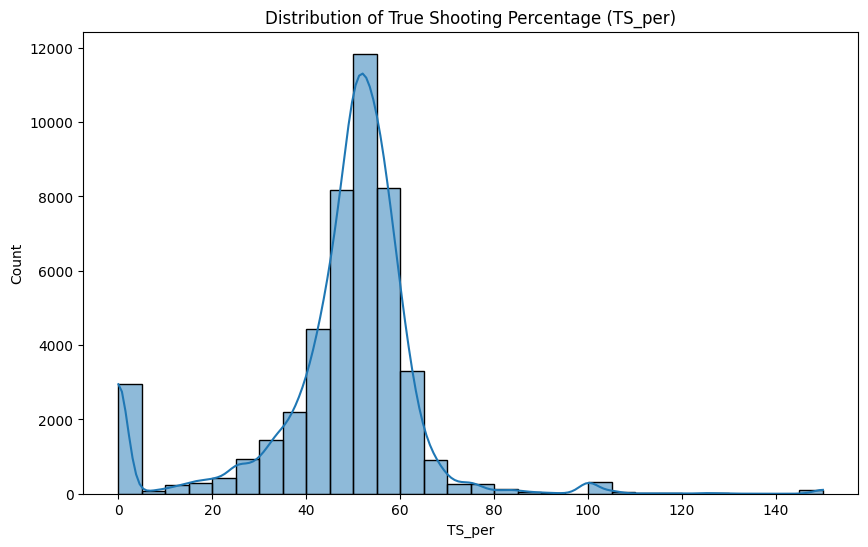

In [19]:
# Hist and kde plot for Shooting Percentage
plt.figure(figsize=(10, 6))
sns.histplot(df['TS_per'], kde=True, bins=30)
plt.title('Distribution of True Shooting Percentage (TS_per)')
plt.show()

Most players fall within the typical 40-60% true shooting range, with very few achieving significantly higher or lower percentages.

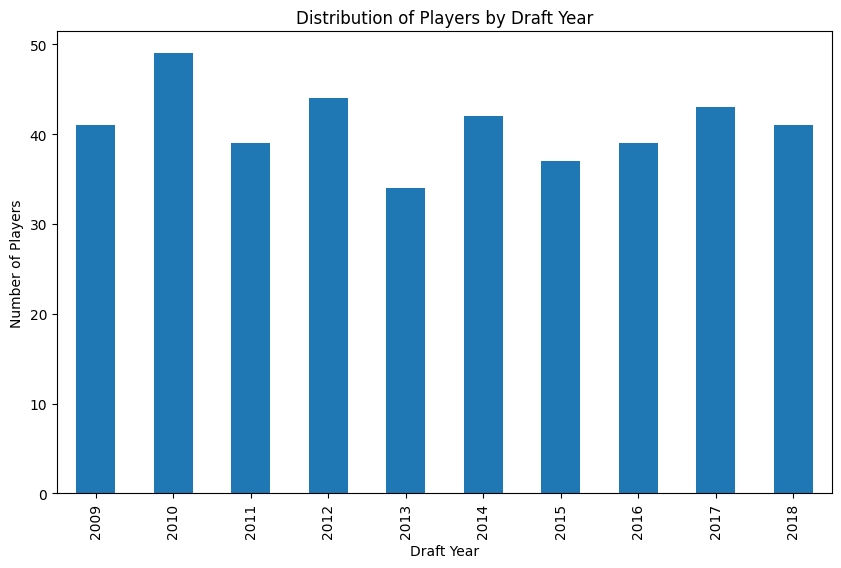

In [20]:
# function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# remove outliers from Ortg and drtg
nba_cleaned = remove_outliers(df, 'Ortg')
nba_cleaned = remove_outliers(nba_cleaned, 'drtg')

# filter for drafted players
drafted_players = nba_cleaned[nba_cleaned['drafted'] == 1.0]

# plot to see number of drafted players in each year
plt.figure(figsize=(10, 6))
drafted_players['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Players by Draft Year')
plt.xlabel('Draft Year')
plt.ylabel('Number of Players')
plt.show()

Dataset shows some variability in the number of players drafted each year, with notable peaks in 2010 and 2012 and a dip in 2013. This suggests that, certain years had larger draft classes, while others had fewer players entering the league.

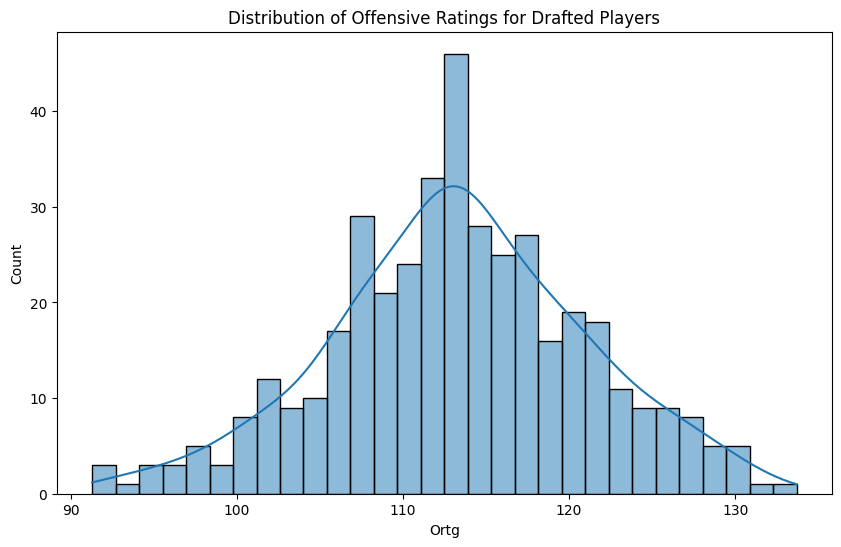

In [21]:
# Additional analysis: Distribution of drafted players' offensive ratings
plt.figure(figsize=(10, 6))
sns.histplot(drafted_players['Ortg'], kde=True, bins=30)
plt.title('Distribution of Offensive Ratings for Drafted Players')
plt.show()

The offensive ratings of drafted players follow a normal distribution, with the majority of players having Otrg values around 110. This suggests that while there are standout performers with higher ratings, most drafted players tend to perform within a similar, efficient offensive range.

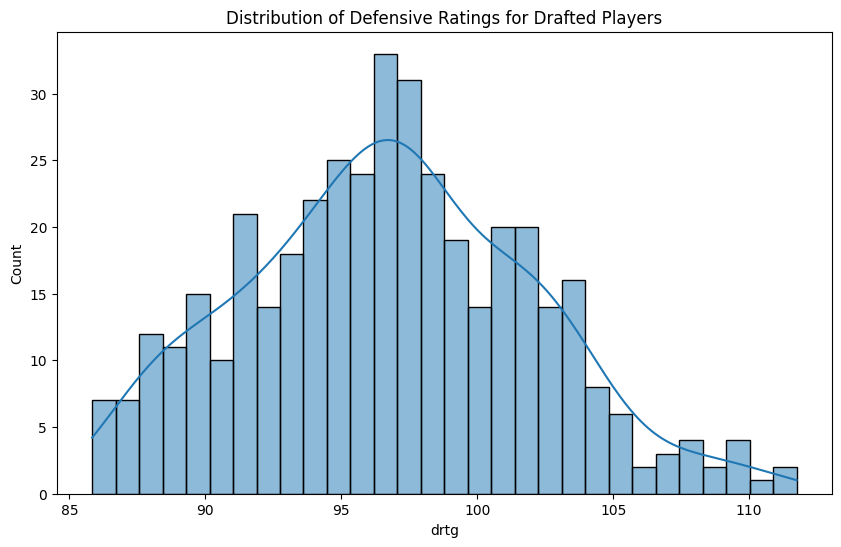

In [22]:
# Additional analysis: Distribution of defensive ratings for drafted players
plt.figure(figsize=(10, 6))
sns.histplot(drafted_players['drtg'], kde=True, bins=30)
plt.title('Distribution of Defensive Ratings for Drafted Players')
plt.show()

The defensive ratings of drafted players are normally distributed, with most players achieving defensive ratings between 95 and 100. This suggests that while there is variation in defensive efficiency among drafted players, the majority perform within a consistent and average defensive range. Outliers, both strong and weak defensively, are less common.

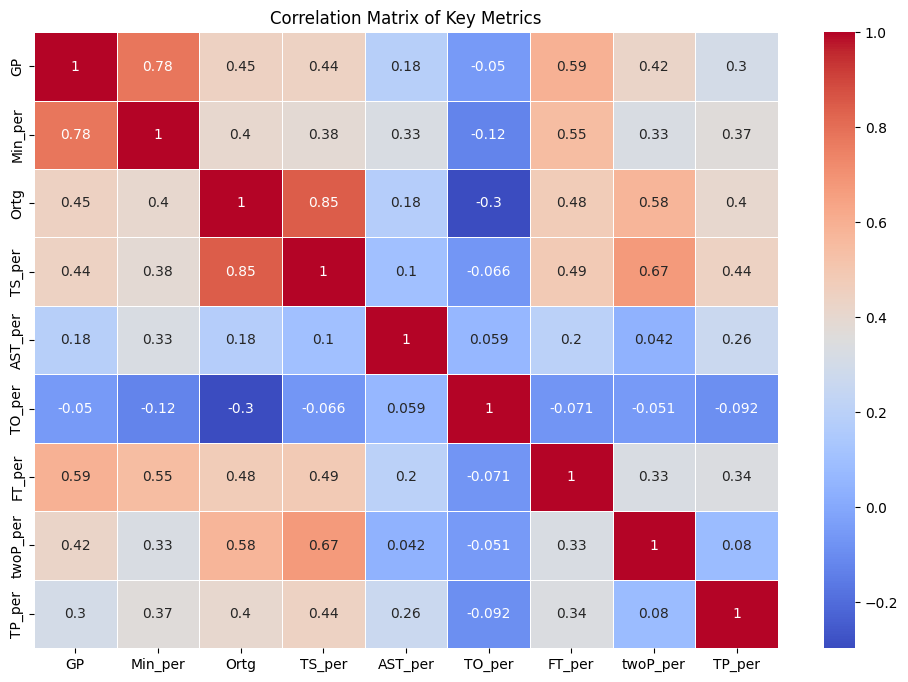

In [23]:
# Looking at correlation of some features
plt.figure(figsize=(12, 8))
corr_matrix = df[['GP', 'Min_per', 'Ortg', 'TS_per', 'AST_per', 'TO_per', 'FT_per', 'twoP_per', 'TP_per']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Key Metrics')
plt.show()

The matrix highlights strong relationships between offensive rating, shooting accuracy, and playing time, while turnovers tend to show weak or negative correlations with other performance metrics.

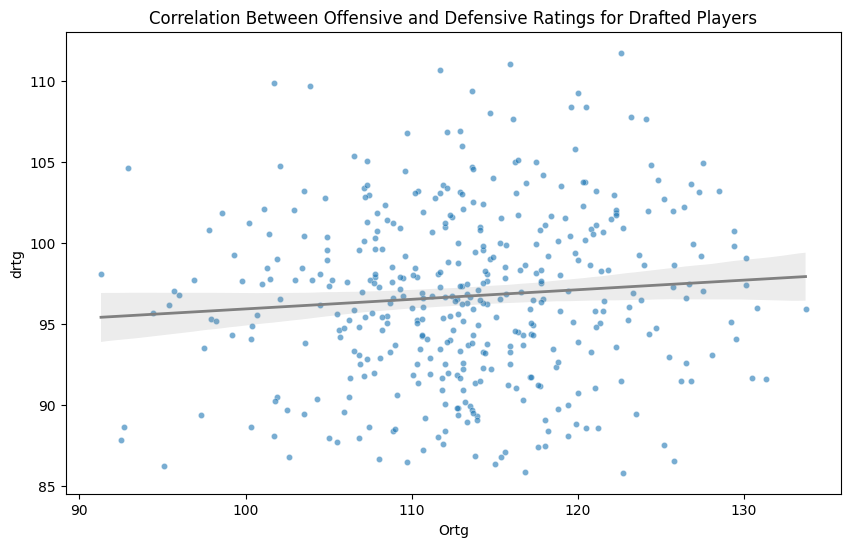

In [24]:
# scatter plot for drafted players
plt.figure(figsize=(10, 6))
sns.scatterplot(data=drafted_players, x='Ortg', y='drtg', palette='coolwarm', s=20, alpha=0.6)

# regression line to see the trend among drafted players
sns.regplot(data=drafted_players, x='Ortg', y='drtg', scatter=False, color='gray', line_kws={"lw": 2})
plt.title('Correlation Between Offensive and Defensive Ratings for Drafted Players')
plt.show()

There is a weak positive correlation between offensive and defensive ratings, implying that players with higher offensive efficiency also tend to have slightly higher defensive ratings, though the relationship is not strong or definitive. This suggests that strong offensive players are not necessarily poor defenders, but the connection between the two ratings is minimal.

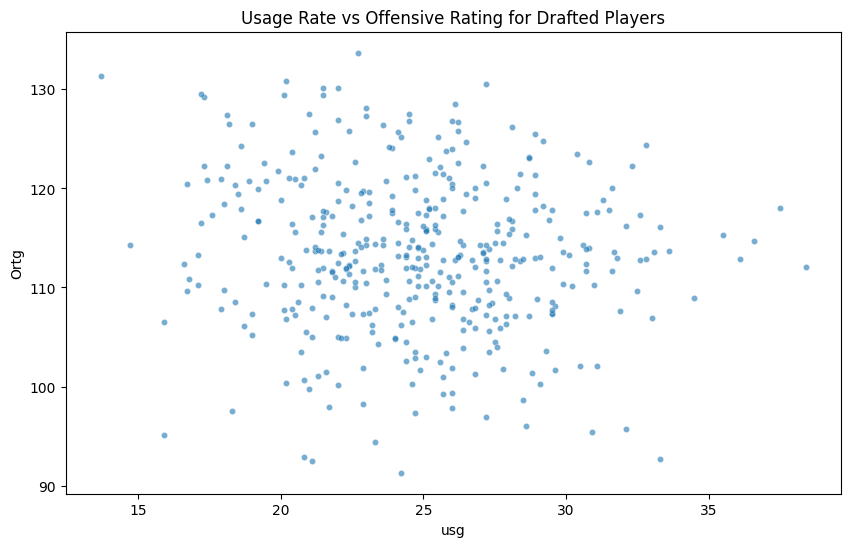

In [25]:
# plot usage rate vs offensive rating for drafted players
plt.figure(figsize=(10, 6))
sns.scatterplot(data=drafted_players, x='usg', y='Ortg', palette='coolwarm', s=20, alpha=0.6)
plt.title('Usage Rate vs Offensive Rating for Drafted Players')
plt.show()

There is little to no correlation between usage rate and offensive rating for drafted players, suggesting that higher usage does not necessarily lead to better offensive efficiency. This indicates that players with varying levels of involvement in the offense can achieve similar offensive ratings.

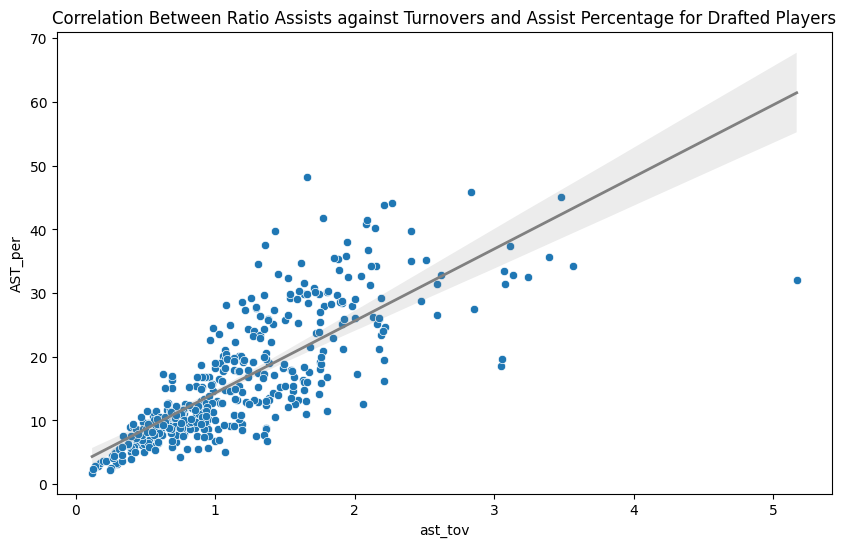

In [26]:
# plot scatter for offensive and de
plt.figure(figsize=(10, 6))
sns.scatterplot(data=drafted_players, x='ast_tov', y='AST_per')
plt.title('Assist-to-Turnover Ratio vs. Assist Percentage')

# Add a regression line to see the trend among drafted players
sns.regplot(data=drafted_players, x='ast_tov', y='AST_per', scatter=False, color='gray', line_kws={"lw": 2})
plt.title('Correlation Between Ratio Assists against Turnovers and Assist Percentage for Drafted Players')
plt.show()


There is a strong positive correlation between assist-to-turnover ratio and assist percentage. Players who manage their turnovers efficiently generally contribute more to assists, which suggests that effective ball handling and decision-making directly impact a player’s assist contribution. 

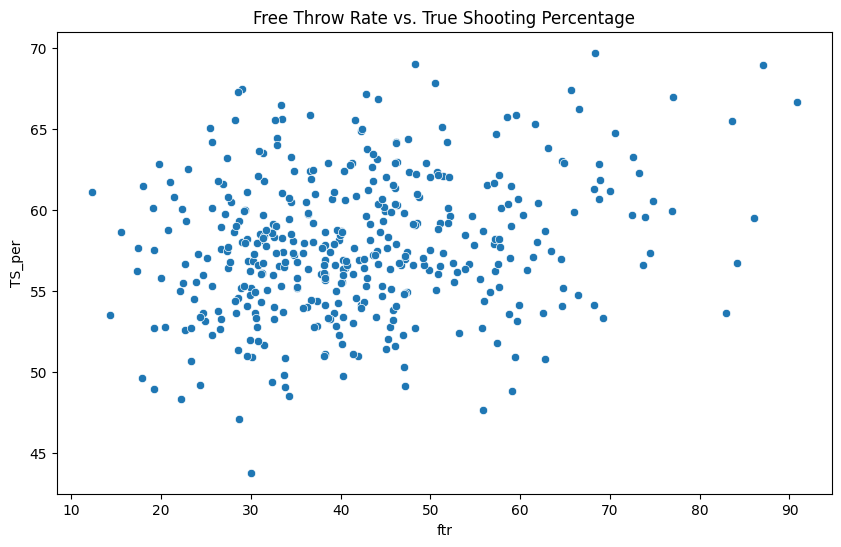

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=drafted_players, x='ftr', y='TS_per')
plt.title('Free Throw Rate vs. True Shooting Percentage')
plt.show()

There seems to be no strong correlation between free throw rate and true shooting percentage, as the data points are scattered across the entire range. This indicates that a player's ability to get to the free throw line does not necessarily impact their overall shooting efficiency. True shooting percentage, which accounts for field goals, three-pointers, and free throws, appears to be influenced by other factors beyond free throw attempts alone.

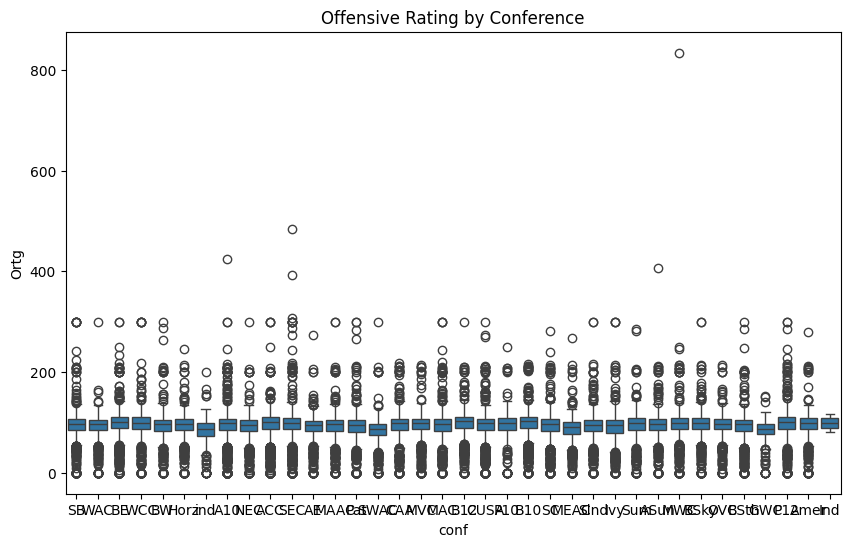

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='conf', y='Ortg')
plt.title('Offensive Rating by Conference')
plt.show()

The offensive ratings across conferences are fairly consistent, with most players performing within a similar range. However, every conference has a notable number of outliers, showing that some players significantly outperform their peers in terms of offensive efficiency. These outliers may represent standout performers within each conference, but the overall distribution of Otrg is similar across conferences.

In [29]:
# Define a dictionary to convert the month names to numbers
month_mapping = {
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4,
    "May": 5, "Jun": 6, "Jul": 7, "Aug": 8,
    "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}

# Apply the conversion
def convert_height(ht_value):
    try:
        feet, inches = ht_value.split('-')
        inches = month_mapping.get(inches, inches)  # Convert "Jun" to "6" or leave as is if it's already numeric
        return int(feet) * 12 + int(inches)
    except (ValueError, AttributeError):
        return np.nan

df['ht'] = df['ht'].apply(lambda x: convert_height(x) if pd.notna(x) else np.nan)

# Impute remaining missing values in 'ht' with the median height
df['ht'] = df['ht'].fillna(df['ht'].median())

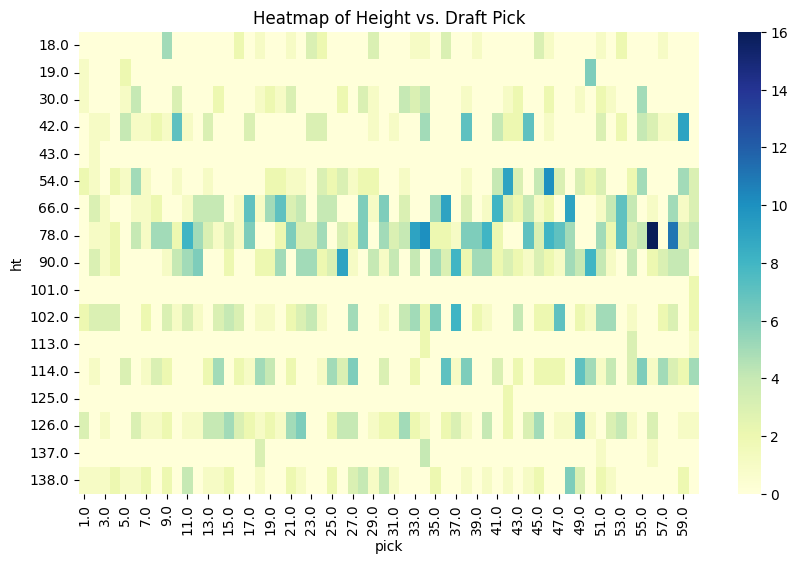

In [30]:
# Plot Heatmap to see height matter in picking of the draft
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['ht'], df['pick']), cmap="YlGnBu", cbar=True)
plt.title('Heatmap of Height vs. Draft Pick')
plt.show()

This pattern implies that while height is an important factor, there is no strict bias towards extremely tall players in the top picks, and players within the average height range are selected more commonly across all draft rounds.

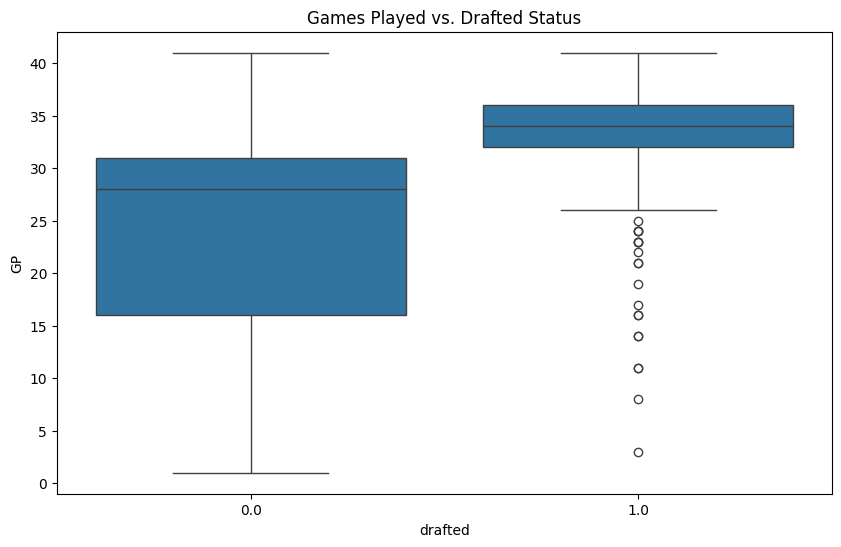

In [31]:
# box plot for draft vs games played
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='drafted', y='GP')
plt.title('Games Played vs. Drafted Status')
plt.show()

Drafted players generally play more games compared to undrafted players, and their games played tend to be more consistent. This suggests that consistent playing time could be an important factor in determining draft status, with fewer drafted players playing significantly fewer games than undrafted players.

### 5. Prepare Data

In [32]:
df_cleaned = df.copy()
df_clean_test = test_df.copy()

In [33]:
# Droping identifiers and other columns with missing values
df_cleaned = df_cleaned.drop(columns=['player_id', 'team', 'num', 'Rec_Rank', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'pick'])
df_clean_test = df_clean_test.drop(columns=['team', 'num', 'Rec_Rank', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'pick'])

In [34]:
#checking null values
print(df_cleaned.isnull().sum().sum(), df_clean_test.isnull().sum().sum())

4467 562


In [35]:
# filling up the categorical values with mode and numerical by mean
for column in df_clean_test.columns:
    if df_clean_test[column].dtype == 'object' or df_clean_test[column].dtype.name == 'category':
        # Fill categorical columns with mode
        df_clean_test[column].fillna(df_clean_test[column].mode()[0], inplace=True)
    else:
        # Fill numerical columns with mean
        df_clean_test[column].fillna(df_clean_test[column].mean(), inplace=True)

In [36]:
# drop remaining null columns
df_cleaned.dropna(inplace=True)

In [37]:
# checking if there is null values
print(df_cleaned.isnull().sum().sum(), df_clean_test.isnull().sum().sum())

0 0


In [38]:
# checking shape
df_cleaned.shape

(43031, 50)

### 6. Split Dataset

In [39]:
# differentiate target and features
y = df_cleaned.pop(target)
X = df_cleaned

X_test = df_clean_test

In [40]:
from sklearn.model_selection import train_test_split

# splitting train and val set
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

### 7. Baseline Model

In [41]:
from sklearn.dummy import DummyClassifier

# DummyClassifier as a baseline model
model = DummyClassifier(strategy="most_frequent")  # or another strategy
model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

### 8. Assess Model Performance

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve


y_pred_prob = model.predict_proba(X_train)[:, 1]
roc_auc = roc_auc_score(y_train, y_pred_prob)

# print ROC AUC score
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.5


In [43]:
# predict probabilites
y_pred_val_prob = model.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred_val_prob)

# print ROC AUC score
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.5


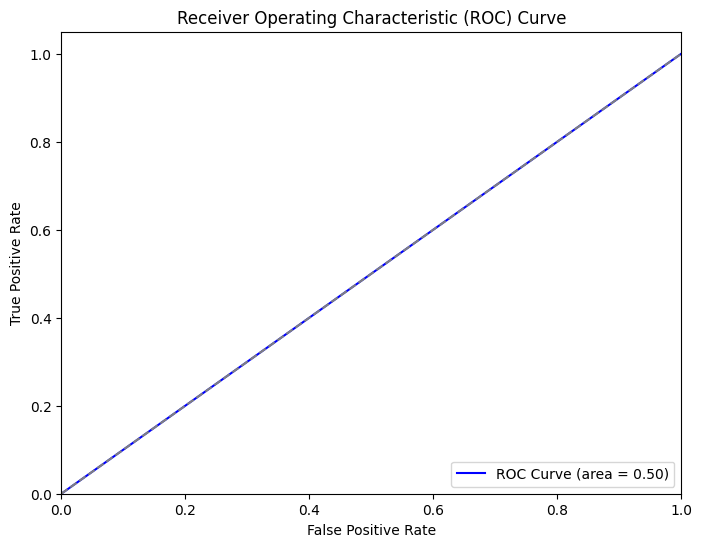

In [44]:
# compute ROC curve data
fpr, tpr, thresholds = roc_curve(y_val, y_pred_val_prob)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for a random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [45]:
# save submissions for kaggle
test_df['predicted_probability'] = model.predict_proba(X_test)[:,1]
test_df[['player_id', 'predicted_probability']].to_csv('submission.csv', index=False)

In [46]:
test_df[['player_id', 'predicted_probability']]

,player_id,predicted_probability
0,23549e01-c1b3-4ca0-a0fd-de9b5d76276b,0.0
1,52a518bb-b34a-4b43-adee-5e996cb853fa,0.0
2,ad3d9117-b6bf-4675-ab97-3497acf3e555,0.0
3,eaf66a5c-6f4c-4070-bc70-a99d731b3740,0.0
4,55d07491-5bd1-447f-844e-9cb36eaa442e,0.0
...,...,...
4965,28222513-8a1f-4a48-8fde-16888e9e11ce,0.0
4966,c32a466d-7a66-47eb-805c-a94e328261bc,0.0
4967,55f0ddef-9f29-47ae-87b5-da43c687d25c,0.0
4968,460d6a42-5dbc-48f0-bc94-3650da83f345,0.0
